# Projekt XI - House Rent Prediction

Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats available for rent with different parameters.

            key features: EDA, Clustering, Supervised Learning, Unsupervised Learning, Price Prediction

Dataset available at [Link](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

#### Objectives:

   * EDA
   * Clustering
   * Predict House Price based on features
   
Target Feature: Rent

##### Used Algorithims

- 
- 

#### Phases:
   * Preprocessing
   * EDA
   * Clustering
   * Price Prediction

In [2]:
#libs and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plotly
import plotly as py
import plotly.express as px
import plotly.io as pio


In [3]:
#read df
df = pd.read_csv('data/House_Rent_Dataset.csv')

In [4]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
#look for null values
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
df.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

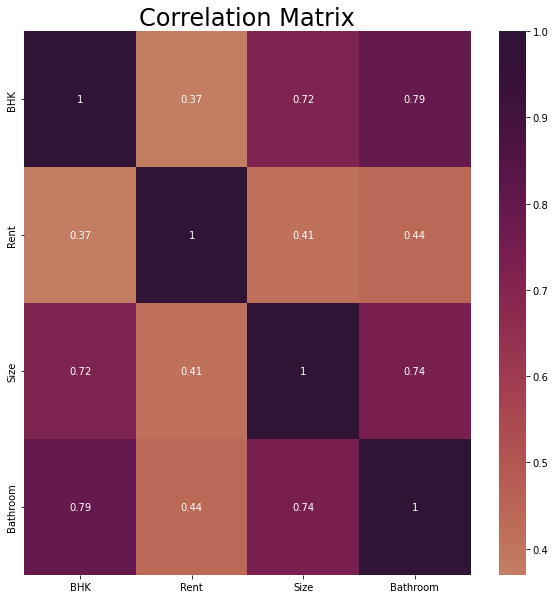

In [8]:
#correlation Matrix
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr, annot = True, center = 0, cmap = 'twilight_shifted')
ax.set_title('Correlation Matrix', fontsize = 24)

What do we have:
* No null values.
* Plenty of non numerical values that will need future label enconding
* Some correlation between Rent and other numerical features
* some non numerical features with high number of unique values

What to do now:
* Transform 'Posted On' column in datetime format
* Work on 'Floor' and 'Area Locality' features for better understanding

In [9]:
#transform to datetime
df['Posted On'] = pd.to_datetime(df['Posted On'])

In [10]:
#look at unique values on Floor feature
df['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

Considering the amount of unique values on Floor feature there are two things I want to try. The first one is to make a split and take only de floor value, while also turning object values into numerical data. The second thing is to try to make a list with two values, first one being the floor and second the building size.

In [11]:
#Unique Rented Floors
df['Floor'].str.split(' ').str[0].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper', '11',
       'Lower', '6', '14', '43', '13', '18', '17', '9', '19', '60', '34',
       '12', '26', '25', '53', '16', '10', '39', '32', '47', '28', '20',
       '15', '65', '40', '37', '22', '21', '30', '35', '33', '44', '41',
       '46', '27', '45', '48', '50', '24', '23', '29', '49', '36', '76'],
      dtype=object)

In [12]:
#Unique Building Size
df['Floor'].str.split(' ').str[-1].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34',
       'Ground'], dtype=object)

In [13]:
#First Option
df_01 = df
df_01['Rented Floor'] = df_01['Floor'].str.split(' ').str[0] #split and get 1st element
df_01.loc[df_01['Rented Floor'] == 'Ground', 'Rented Floor'] = 1 #change 'Ground' value to 1
df_01['Rented Floor'].unique()

array([1, '1', '2', '4', '3', '5', '7', '8', 'Upper', '11', 'Lower', '6',
       '14', '43', '13', '18', '17', '9', '19', '60', '34', '12', '26',
       '25', '53', '16', '10', '39', '32', '47', '28', '20', '15', '65',
       '40', '37', '22', '21', '30', '35', '33', '44', '41', '46', '27',
       '45', '48', '50', '24', '23', '29', '49', '36', '76'], dtype=object)

In [14]:
#Second option
df_02 = df
df_02['Rented Floor'] = df_02['Floor'].str.split(' ').str[0] #split and get 1st element
df_02['Build Size'] = df_02['Floor'].str.split(' ').str[-1] #split and get last element
#Rented Floor
df_02.loc[df_02['Rented Floor'] == 'Ground', 'Rented Floor'] = 1 #change 'Ground' value to 1
df_02.loc[df_02['Rented Floor'] == 'Upper', 'Rented Floor'] = df_02['Build Size'] #change 'Upper' value to last element
df_02.loc[df_02['Rented Floor'] == 'Lower', 'Rented Floor'] = 1 #change 'Lower' value to first element
#Build Size
df_02.loc[df_02['Build Size'] == 'Ground', 'Build Size'] = 1 #change 'Ground' value to 1
pd.to_numeric(df_02['Rented Floor'])
pd.to_numeric(df_02['Build Size'])
df_02['Floor'] = df_02[['Rented Floor','Build Size']].values.tolist() #change original floor values to a list tpye
df_02[['Floor','Rented Floor','Build Size']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Floor         4746 non-null   object
 1   Rented Floor  4746 non-null   object
 2   Build Size    4746 non-null   object
dtypes: object(3)
memory usage: 111.4+ KB


In [41]:
#Result
df = df_02
df_02[['Floor','Rented Floor','Build Size']]


,Floor,Rented Floor,Build Size
0,"[1, 2]",1,2
1,"[1, 3]",1,3
2,"[1, 3]",1,3
3,"[1, 2]",1,2
4,"[1, 2]",1,2
...,...,...,...
4741,"[3, 5]",3,5
4742,"[1, 4]",1,4
4743,"[3, 5]",3,5
4744,"[23, 34]",23,34


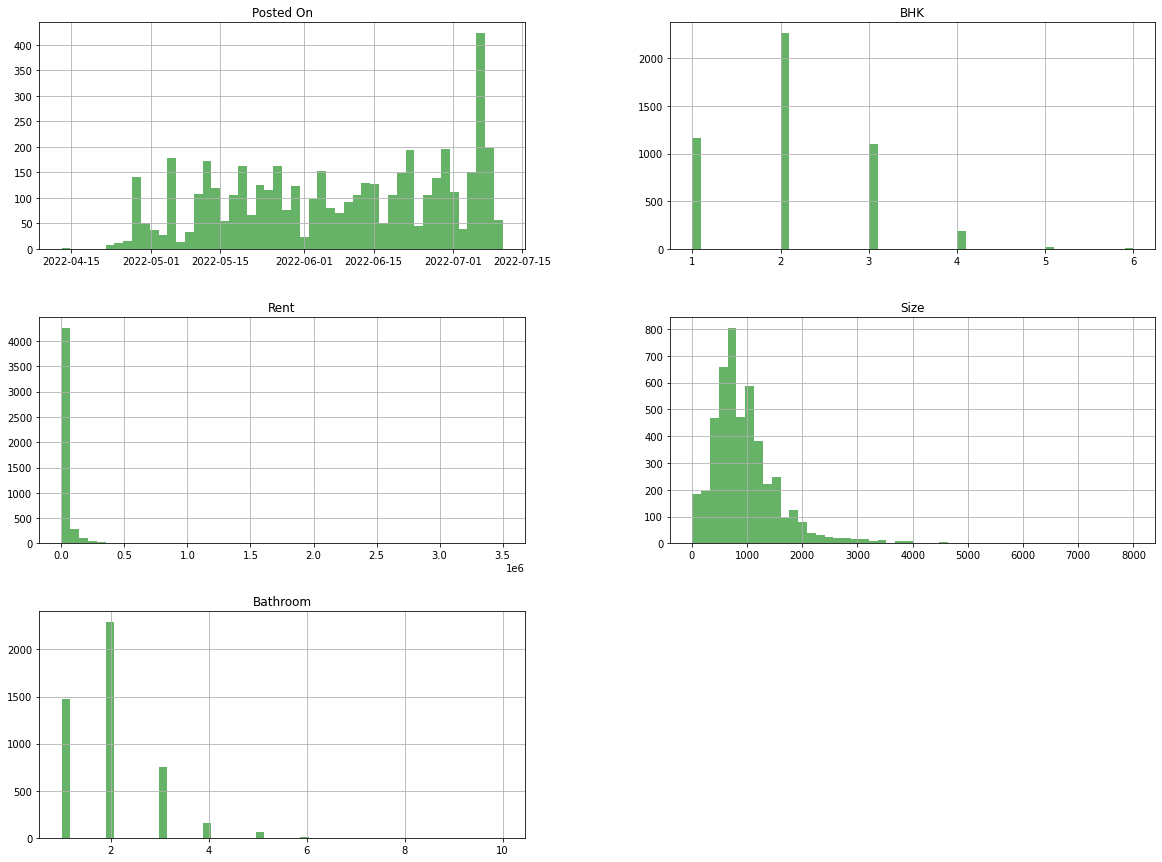

In [16]:
#check histogram
df.hist(bins=50, figsize=(20,15),color='green',alpha=0.6)
plt.show()

<AxesSubplot:>

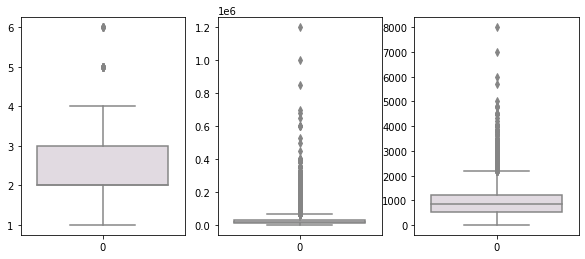

In [38]:
#verify outliers
fig, [ax1, ax2, ax3] = plt.subplots(nrows = 1, ncols = 3, figsize = (10 , 4))
sns.boxplot(data = df['BHK'], palette= 'twilight_shifted', ax = ax1)
sns.boxplot(data = df['Rent'], palette= 'twilight_shifted', ax = ax2)
sns.boxplot(data = df['Size'], palette= 'twilight_shifted', ax = ax3)

In [43]:
#remove rent outlier
df = df[df['Rent'] < 1500000]

Done, now lets make some EDA

### EDA

In [18]:
fig = px.pie(df, names = 'Area Type',title = 'Number of Rents by Area Type')
fig.update_traces(hoverinfo='label', textinfo='percent+value')
fig.show()


In [19]:
fig = px.pie(df, names = 'City',title = 'Number of Rents by City')
fig.update_traces(hoverinfo='label', textinfo='percent+value')
fig.show()

In [20]:
fig = px.histogram(df, x = 'Furnishing Status', color = 'Tenant Preferred' ,title = 'Number of Rents by Furnishing Status')
fig.show()

In [44]:
fig = px.scatter_3d(df, x = 'Rented Floor', y = 'Build Size',z='Rent', color = 'City')
fig.show()

Look for correlations